In [1]:
import pickle

In [2]:
model_pkl = open("store_model.pkl", "rb")

In [3]:
forest_reg = pickle.load(model_pkl)

In [4]:
forest_reg

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
                      max_features=4, max_leaf_nodes=4,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=4, min_samples_split=4,
                      min_weight_fraction_leaf=0.0, n_estimators=250,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [5]:
import pandas as pd
import numpy as np
testData = pd.read_csv("../County2009_2018/county2018_final.csv", usecols=[2, 3, 4, 5, 6, 7])

In [6]:
indexes = testData['FIPS']
testData.index = testData['FIPS']
testData.head()

,FIPS,Poverty Rate,Income,Unemployment Rate,Prescription Rate,Death Rate
FIPS,,,,,,
1003,1003,9.8,57588,3.6,93.6,6.42
1043,1043,14.5,45796,3.3,126.7,13.18
1055,1055,17.5,44903,4.1,126.1,14.63
1073,1073,16.1,55013,3.7,95.8,20.63
1089,1089,11.9,63755,3.5,85.4,3.00


In [7]:
y_test = testData.iloc[:, 5]

In [8]:
x_test = testData.iloc[:, 1:5]

In [9]:
y_results = forest_reg.predict(x_test)

In [10]:
from sklearn import metrics

In [11]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_results))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_results))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_results)))

Mean Absolute Error: 9.643669239529343
Mean Squared Error: 189.08218402132178
Root Mean Squared Error: 13.750715763963772


In [12]:
outDF = pd.DataFrame(data =indexes)

In [13]:
outDF.head()

,FIPS
0,1003
1,1043
2,1055
3,1073
4,1089


In [14]:
outDF['Real Values'] = y_test.values

In [15]:
outDF['Test Values'] = y_results

In [16]:
outDF.head()

,FIPS,Real Values,Test Values
0,1003,6.42,15.888975
1,1043,13.18,16.662509
2,1055,14.63,16.694546
3,1073,20.63,15.914659
4,1089,3.00,15.786520


In [17]:
f = open('2018_county_results.csv', 'w+')
outDF.to_csv('2018_county_results.csv')

In [18]:
estimator = forest_reg.estimators_[5]
from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = ["Poverty Rate", "Median Household Income", "Unemployment Rate", "Prescription Rate"],
                class_names = "result1",
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])


0

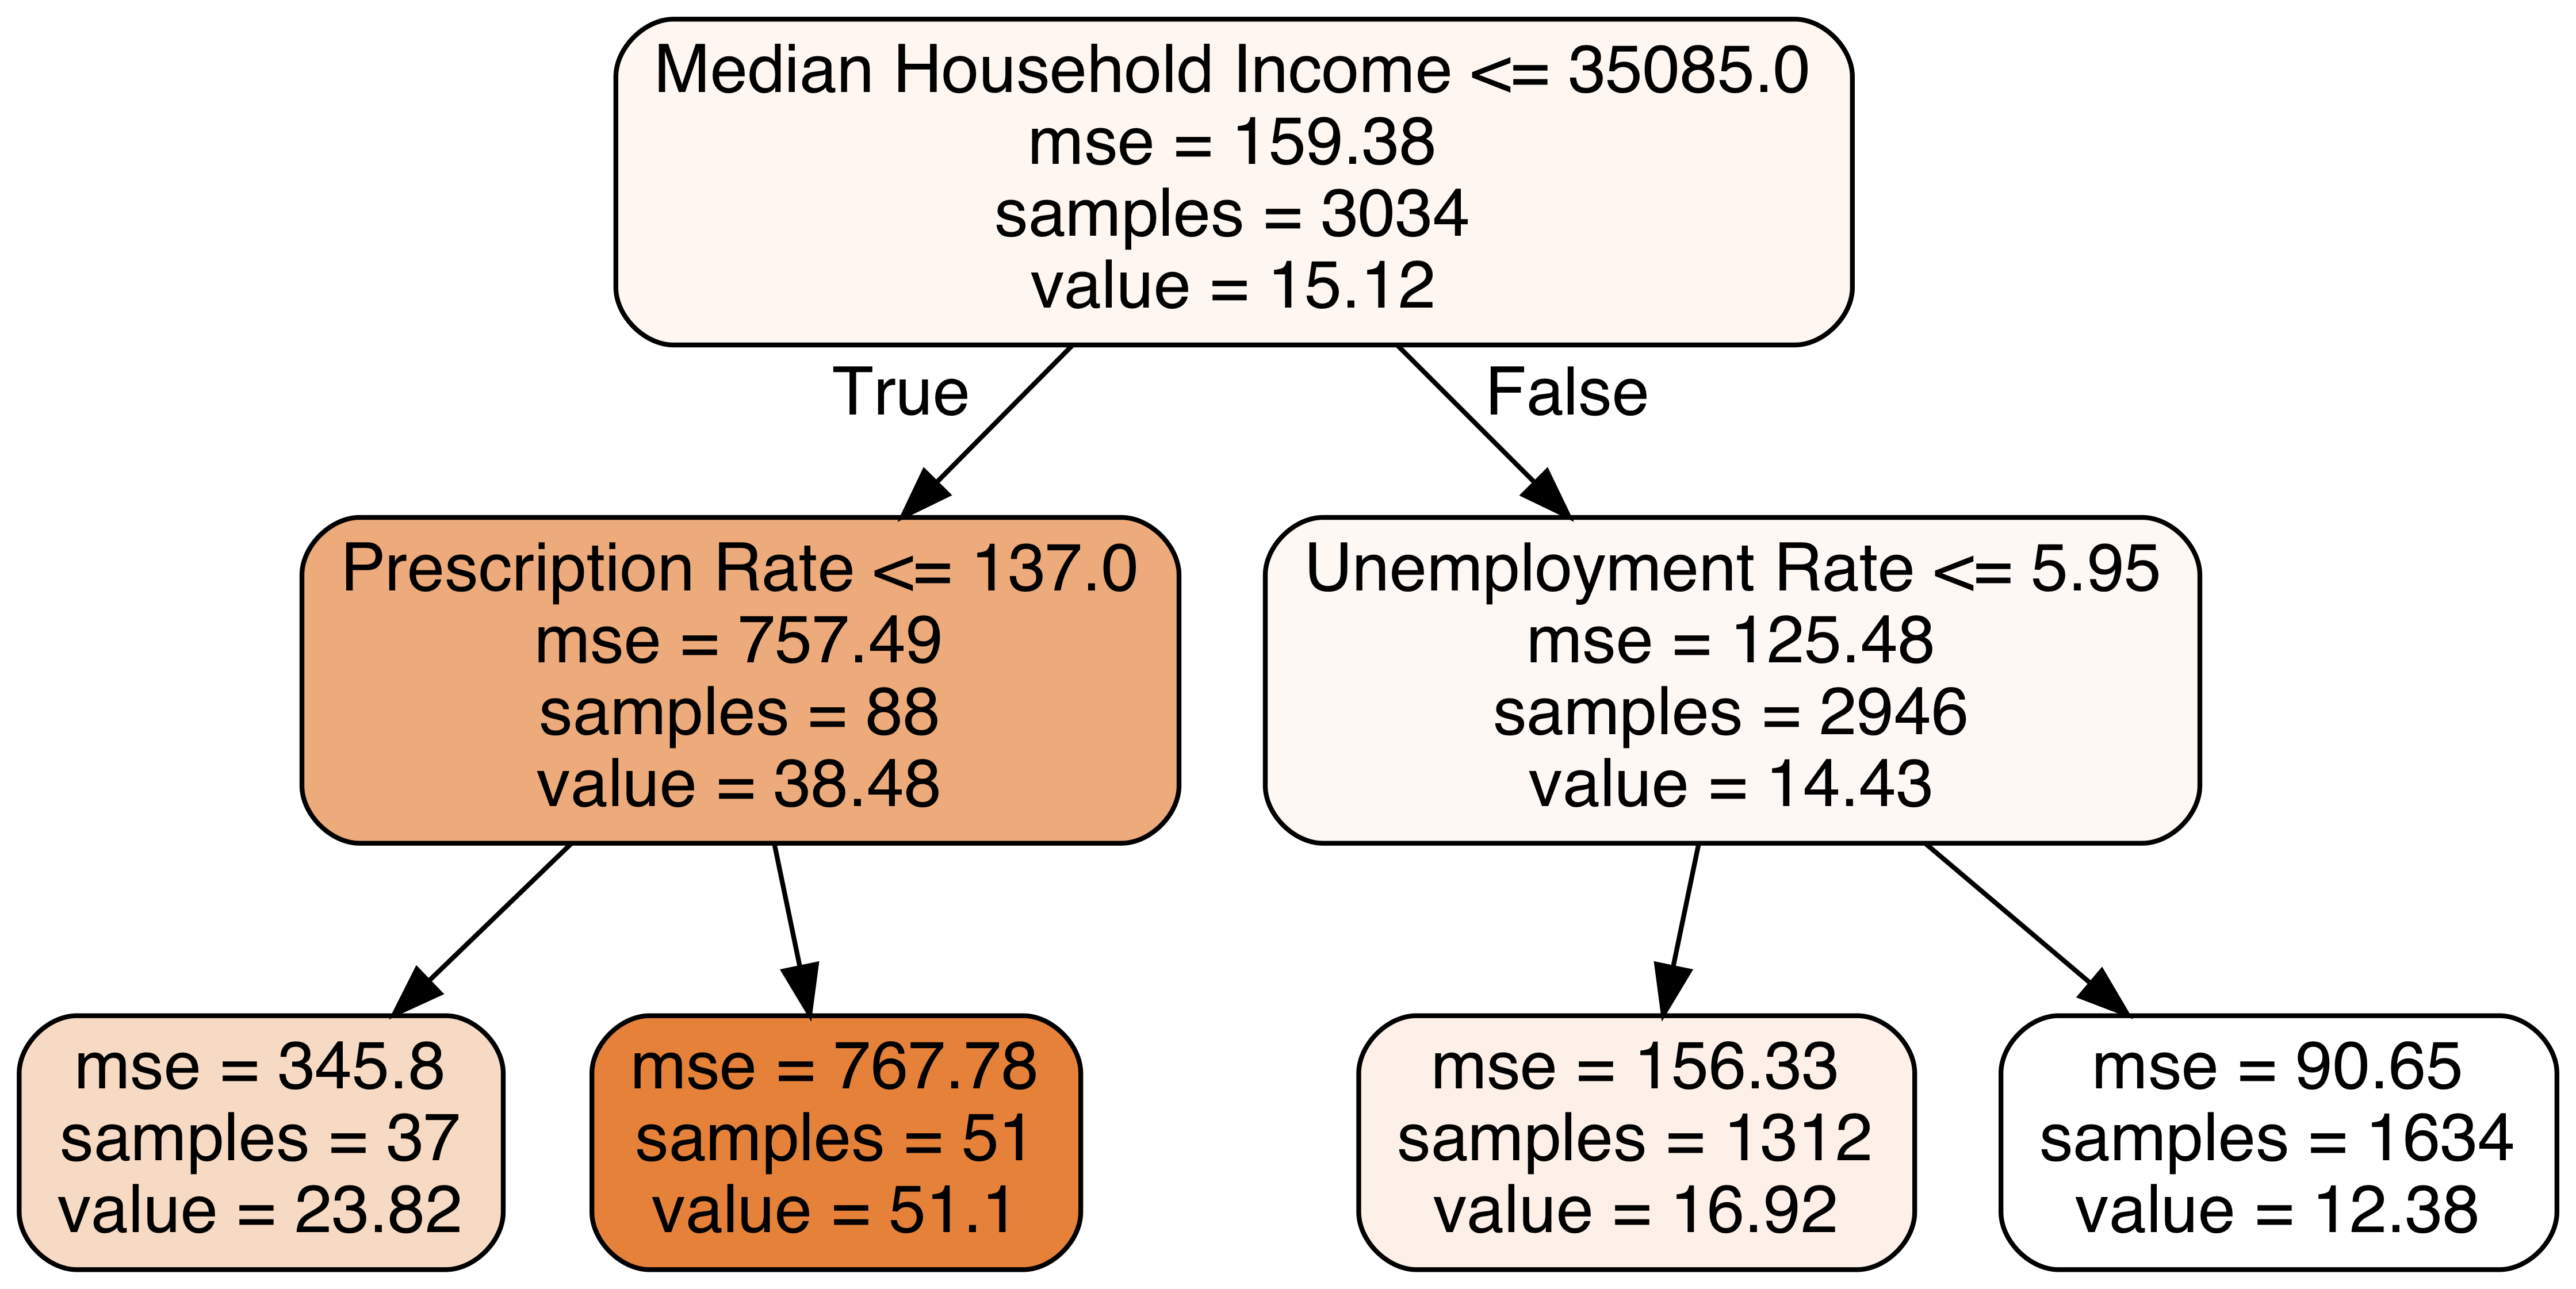

In [19]:
# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')